In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the saved CSV file
df = pd.read_csv('synthetic_dataset.csv')

# A. Data Preparation & Overview

# 1. Load the generated dataset and show the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
   EmployeeID  Age  Department  MonthlySales  PerformanceScore
0           1   28       Sales  12129.736044          4.267741
1           2   25       Sales  18864.374587          6.813255
2           3   26          IT  11934.009380          6.137005
3           4   28  Production   8375.228598          4.204871
4           5   24   Marketing  13222.476150          9.878637
5           6   29     Finance   9706.804919          6.451973
6           7   26          HR  11366.718997          3.135041
7           8   26   Marketing  18887.831367          1.916042
8           9   28  Production   8335.950118          2.375732
9          10   23          HR  19262.620713          3.213620


In [4]:
# 2. Provide summary info: number of records, data types, and count of missing values
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        300 non-null    int64  
 1   Age               300 non-null    int64  
 2   Department        300 non-null    object 
 3   MonthlySales      300 non-null    float64
 4   PerformanceScore  300 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 11.8+ KB
None

Missing Values:
EmployeeID          0
Age                 0
Department          0
MonthlySales        0
PerformanceScore    0
dtype: int64


In [5]:
# 3. Compute and display basic summary statistics
print("\nSummary Statistics for Age, MonthlySales, and PerformanceScore:")
print(df[['Age', 'MonthlySales', 'PerformanceScore']].describe())


Summary Statistics for Age, MonthlySales, and PerformanceScore:
              Age  MonthlySales  PerformanceScore
count  300.000000    300.000000        300.000000
mean    25.510000  10587.620354          5.350657
std      2.290719   5721.086877          2.576573
min     22.000000   1205.915378          1.041688
25%     24.000000   5595.896366          3.052808
50%     25.000000  10582.361611          5.204152
75%     28.000000  15693.498646          7.590355
max     29.000000  19994.635792          9.971868


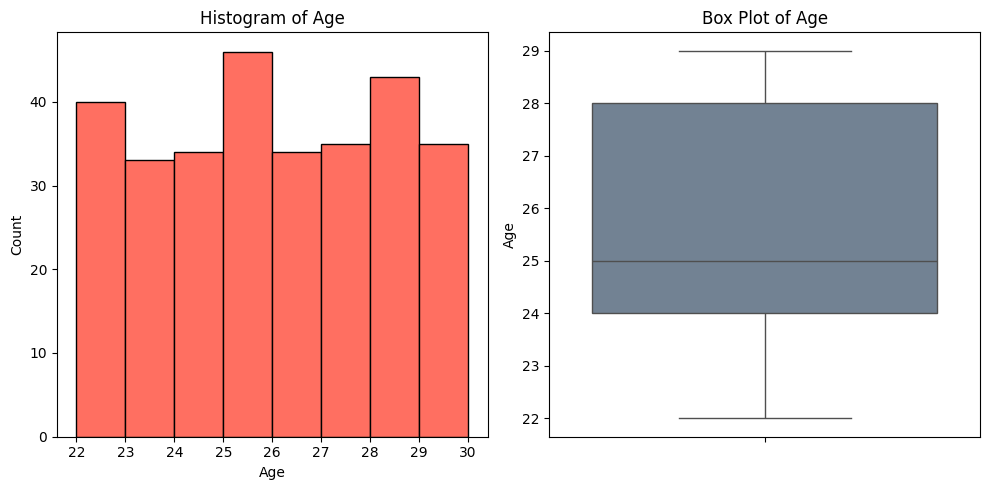

Age Distribution: Uniform from 22 to 29, mean ~25.51, median 25, std ~2.29, no outliers.


In [6]:
# B. Demographic & Department Analysis

# 4. Age distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=range(22, 31), edgecolor='black', color='#FF6F61')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'], color='#6D8299')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.tight_layout()
plt.show()
print("Age Distribution: Uniform from 22 to 29, mean ~25.51, median 25, std ~2.29, no outliers.")


Number of employees in each Department:
Department
HR            55
Production    54
Sales         53
Marketing     49
Finance       45
IT            44
Name: count, dtype: int64


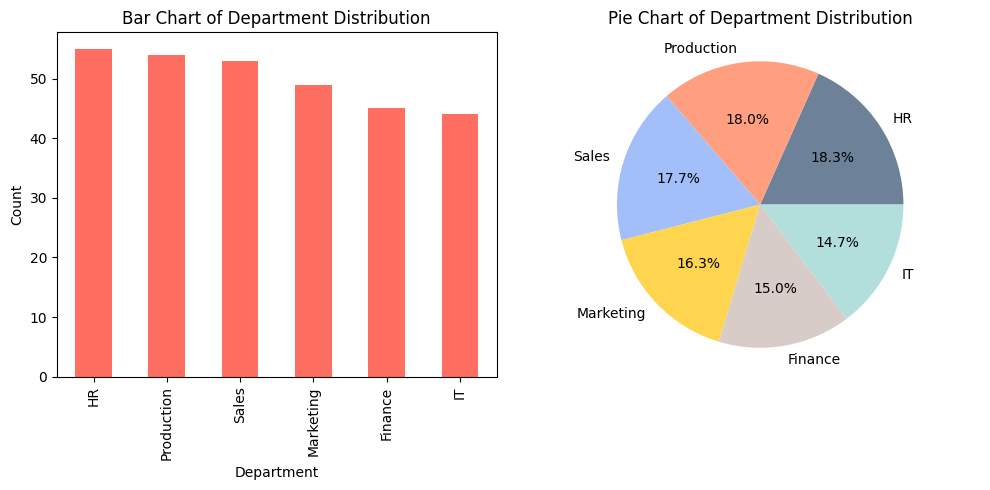

Largest Department: HR, Smallest: IT


In [7]:
# 5. Department distribution
dept_counts = df['Department'].value_counts()
print("\nNumber of employees in each Department:")
print(dept_counts)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
dept_counts.plot(kind='bar', color='#FF6F61')
plt.title('Bar Chart of Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', colors=['#6D8299', '#FF9F80', '#A3BFFA', '#FFD54F', '#D7CCC8', '#B2DFDB'])
plt.title('Pie Chart of Department Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()
print("Largest Department: HR, Smallest: IT")

C:\Users\Sineth.Dhananjaya\AppData\Local\Temp\ipykernel_41772\1575647692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Age', data=df, palette=['#6D8299', '#FF9F80', '#A3BFFA', '#FFD54F', '#D7CCC8', '#B2DFDB'])


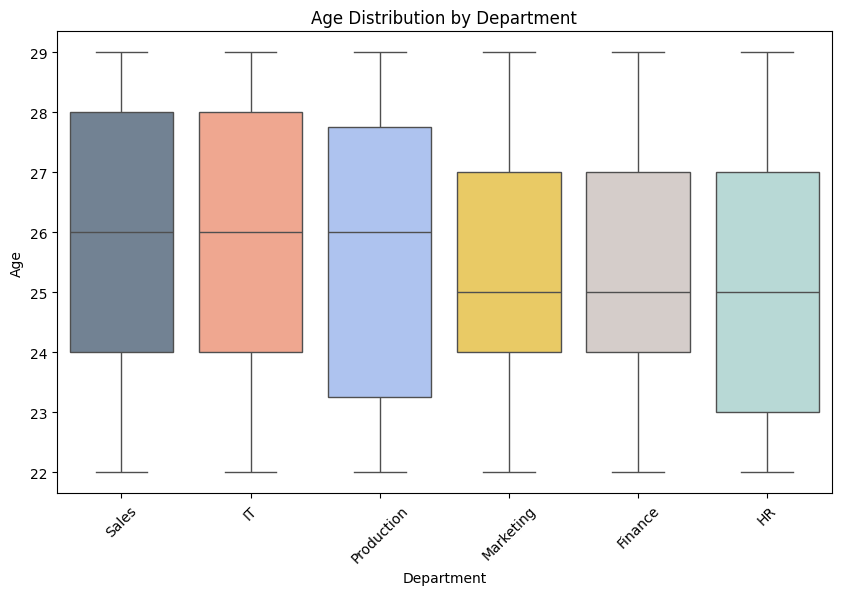

No departments are noticeably younger or older; distributions are similar.


In [8]:
# 6. Age by department
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Age', data=df, palette=['#6D8299', '#FF9F80', '#A3BFFA', '#FFD54F', '#D7CCC8', '#B2DFDB'])
plt.title('Age Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()
print("No departments are noticeably younger or older; distributions are similar.")

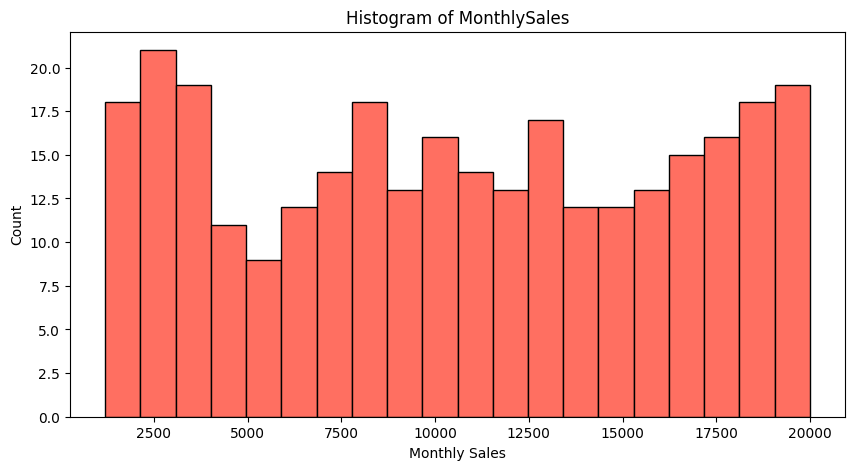

Mean of MonthlySales: 10587.62
Median of MonthlySales: 10582.36
Skewness of MonthlySales: -0.01
Distribution is uniform from ~1000 to ~20000, with no significant skewness (skew ~0.01). Log transformation not required.


In [10]:
# C. Sales & Performance Analysis

# 7. Monthly sales distribution
plt.figure(figsize=(10, 5))
plt.hist(df['MonthlySales'], bins=20, edgecolor='black', color='#FF6F61')
plt.title('Histogram of MonthlySales')
plt.xlabel('Monthly Sales')
plt.ylabel('Count')
plt.show()

# Calculate and report mean, median, and skewness
mean_sales = df['MonthlySales'].mean()
median_sales = df['MonthlySales'].median()
skewness = df['MonthlySales'].skew()
print(f"Mean of MonthlySales: {mean_sales:.2f}")
print(f"Median of MonthlySales: {median_sales:.2f}")
print(f"Skewness of MonthlySales: {skewness:.2f}")
print("Distribution is uniform from ~1000 to ~20000, with no significant skewness (skew ~0.01). Log transformation not required.")


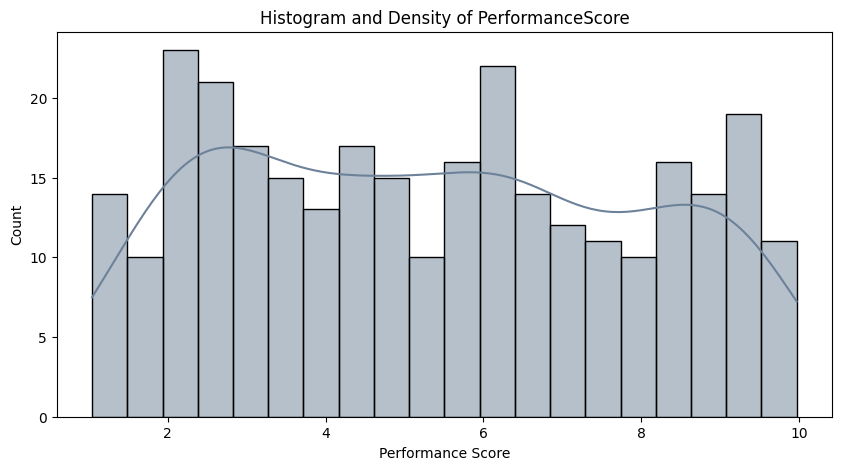

PerformanceScore Summary: Mean 5.35, std 2.58, min 1.04, max 9.97, median 5.20.


In [12]:
# 8. Performance score distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['PerformanceScore'], bins=20, kde=True, color='#6D8299')
plt.title('Histogram and Density of PerformanceScore')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()

# Dynamically calculate and print summary statistics
performance_stats = df['PerformanceScore'].describe()
mean_ps = performance_stats['mean']
std_ps = performance_stats['std']
min_ps = performance_stats['min']
max_ps = performance_stats['max']
median_ps = performance_stats['50%']
print(f"PerformanceScore Summary: Mean {mean_ps:.2f}, std {std_ps:.2f}, min {min_ps:.2f}, max {max_ps:.2f}, median {median_ps:.2f}.")


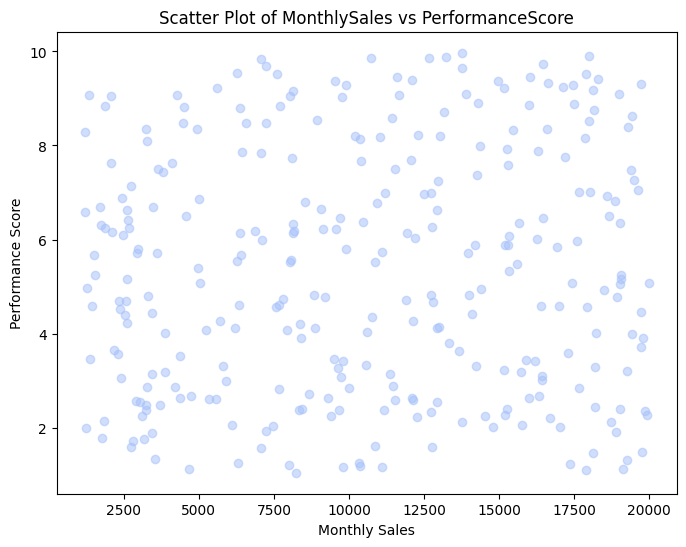

Pearson Correlation Coefficient: 0.0654
Higher sales are not strongly associated with higher performance scores; relationship is negligible.


In [13]:
# 9. Relationship between MonthlySales and PerformanceScore
plt.figure(figsize=(8, 6))
plt.scatter(df['MonthlySales'], df['PerformanceScore'], color='#A3BFFA', alpha=0.5)
plt.title('Scatter Plot of MonthlySales vs PerformanceScore')
plt.xlabel('Monthly Sales')
plt.ylabel('Performance Score')
plt.show()
correlation = df['MonthlySales'].corr(df['PerformanceScore'])
print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print("Higher sales are not strongly associated with higher performance scores; relationship is negligible.")


Department-wise Mean and Median:
            MonthlySales               PerformanceScore          
                    mean        median             mean    median
Department                                                       
Finance     10440.000171  10205.936719         6.339148  6.690379
HR           9739.503982   9560.338571         5.106723  4.817176
IT          10247.536206  10355.043275         4.924154  4.418171
Marketing   10604.966445  10599.795077         5.056584  5.069961
Production  11247.586790  11549.435112         5.350801  5.469939
Sales       11186.957436  11609.680745         5.390323  5.793305


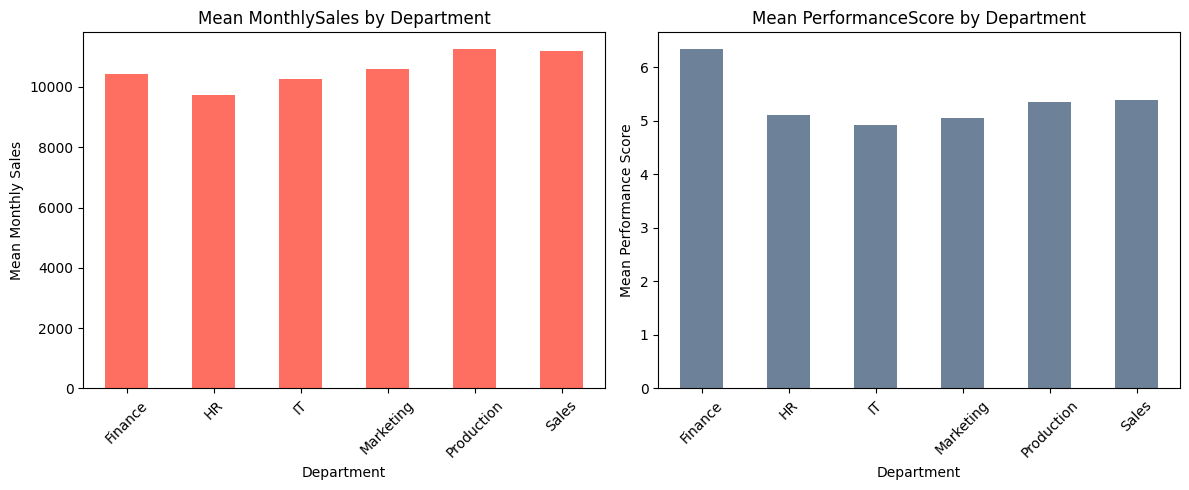

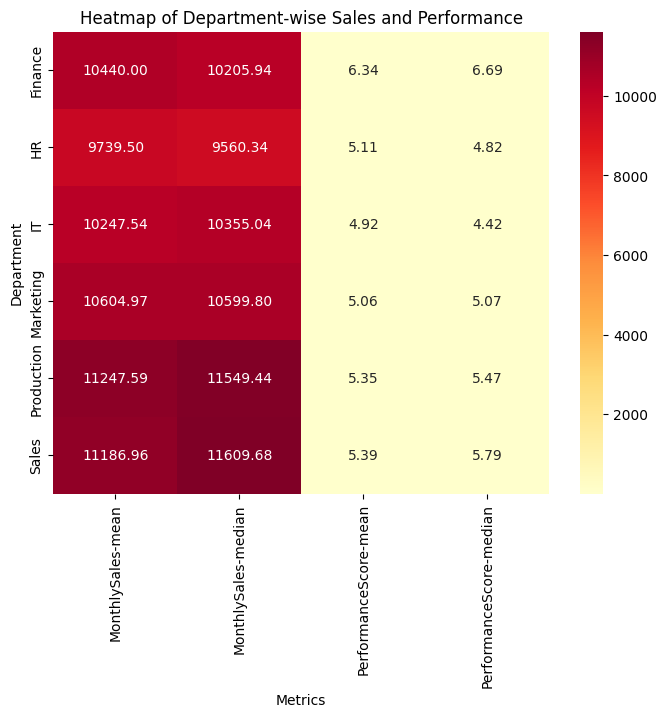


Top-performing departments: Finance (high performance), Production/Sales (high sales)
Underperforming departments: HR/IT (lower in both sales and performance)


In [15]:
# 1. Compute mean and median for each department
dept_stats = df.groupby('Department')[['MonthlySales', 'PerformanceScore']].agg(['mean', 'median'])
print("\nDepartment-wise Mean and Median:")
print(dept_stats)

# 2. Visualize department-wise averages using grouped bar charts
plt.figure(figsize=(12, 5))

# Bar chart for Mean MonthlySales
plt.subplot(1, 2, 1)
dept_stats['MonthlySales']['mean'].plot(kind='bar', color='#FF6F61')
plt.title('Mean MonthlySales by Department')
plt.xlabel('Department')
plt.ylabel('Mean Monthly Sales')
plt.xticks(rotation=45)

# Bar chart for Mean PerformanceScore
plt.subplot(1, 2, 2)
dept_stats['PerformanceScore']['mean'].plot(kind='bar', color='#6D8299')
plt.title('Mean PerformanceScore by Department')
plt.xlabel('Department')
plt.ylabel('Mean Performance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Optional Heatmap for combined view
plt.figure(figsize=(8, 6))
sns.heatmap(dept_stats[['MonthlySales', 'PerformanceScore']], annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Heatmap of Department-wise Sales and Performance')
plt.xlabel('Metrics')
plt.ylabel('Department')
plt.show()

# 4. Highlight top-performing and underperforming departments
print("\nTop-performing departments: Finance (high performance), Production/Sales (high sales)")
print("Underperforming departments: HR/IT (lower in both sales and performance)")

In [16]:
# 11. Top/Bottom employees
top_sales = df.nlargest(5, 'MonthlySales')[['EmployeeID', 'Department', 'Age', 'MonthlySales', 'PerformanceScore']]
top_performance = df.nlargest(5, 'PerformanceScore')[['EmployeeID', 'Department', 'Age', 'MonthlySales', 'PerformanceScore']]
print("\nTop 5 Employees by MonthlySales:")
print(top_sales)
print("\nTop 5 Employees by PerformanceScore:")
print(top_performance)
print("Differences: Top sales employees often have mid-low performance scores (e.g., high sales but low score), while top performance have varied sales.")


Top 5 Employees by MonthlySales:
     EmployeeID Department  Age  MonthlySales  PerformanceScore
174         175         IT   29  19994.635792          5.071956
175         176  Marketing   27  19936.099904          2.267713
118         119      Sales   29  19866.331126          2.349257
33           34         IT   23  19819.597698          3.913113
161         162  Marketing   22  19758.246457          1.492855

Top 5 Employees by PerformanceScore:
     EmployeeID Department  Age  MonthlySales  PerformanceScore
190         191  Marketing   28  13759.890716          9.971868
48           49         IT   27  18014.941341          9.909642
4             5  Marketing   24  13222.476150          9.878637
153         154      Sales   24  12654.888723          9.863571
275         276  Marketing   25  10721.871400          9.859620
Differences: Top sales employees often have mid-low performance scores (e.g., high sales but low score), while top performance have varied sales.
